1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
# bisogna innanzitutto generare un dataset contentenente 3 features ognuna con N input (dell'ordine di 1000) 
# genero un dataframe come un dizionario con etichette x1,x2,x3 
import pandas as pd 
import numpy as np 
from scipy import linalg as la
import matplotlib.pyplot as plt 
N = 1000
data = {'x1' : np.array([np.random.normal(0, 1) for i in range(N)])}
data['x2'] = data['x1'] + np.array([np.random.normal(0, 3) for i in range(N)])
data['x3'] = 2*data['x1'] + data['x2']
df = pd.DataFrame(data)
covmat = np.cov(df.T) 
# Per calcolare la matrice di covarianza sono necessari vettori riga per ogni feature (3,1000)
l, V = np.linalg.eig(covmat)  
i = np.argsort(-l)
l = l[i]
V = V[:,i]
# In questo modo riordino gli autovalori all'interno della lista l e anche i corrispondenti autovettori dal pià grande al più piccolo (tramite l'utilizzo della lista -l)
# Calcolo gli stessi autovalori e autovettori tramite la SVD del dataframe df. Essa infatti mi restituisce i medesimi risultati per la matrice XX^T (a differenza di prima manca (N-1) come dividendo della matrice di covarianza)
U, spectrum, Vt = np.linalg.svd(df)
l_svd = spectrum**2/(N-1)
V_svd = U
j = np.argsort(-l_svd)
l_svd = l_svd[j]
V_svd = V_svd[:,j]
print("Eigenvalues from cov matrix are",l,"\nEigenvalues from SVD are",l_svd) 
# Paragonando i due metodi osserviamo a meno di una permutazione che gli autovalori sono gli stessi ma uno dei tre differisce, sebbene comunque esso sia prossimo allo zero, di 16 ordini di grandezza rispetto al primo (e-15 da e-30)
# per osservare quale percentuale della totale variabilità dei dati è rappresentata dalle componenti principali ricordo che la varianza di una colonna del dataset è proporzionale all'autovalore della matrice XX^T ottenuta dalla SVD 
trace = np.sum(l)
trace_svd = np.sum(l_svd)
print("Percentage of the total dataset's variability explained by the principal component of largest eigenvalue:",(l[0]/trace)*100)
print("Percentages of the total dataset's variability explained by the principal component of the 2 largest eigenvalues:",(np.sum(l[:2]))/trace*100)

Eigenvalues from cov matrix are [2.80558156e+01 1.88208712e+00 1.02722033e-15] 
Eigenvalues from SVD are [2.80728296e+01 1.88208731e+00 2.35622991e-32]
Percentage of the total dataset's variability explained by the principal component of largest eigenvalue: 93.71336350861291
Percentages of the total dataset's variability explained by the principal component of the 2 largest eigenvalues: 100.0


Text(0.5, 1.0, 'new $x_2$ vs $x_3$')

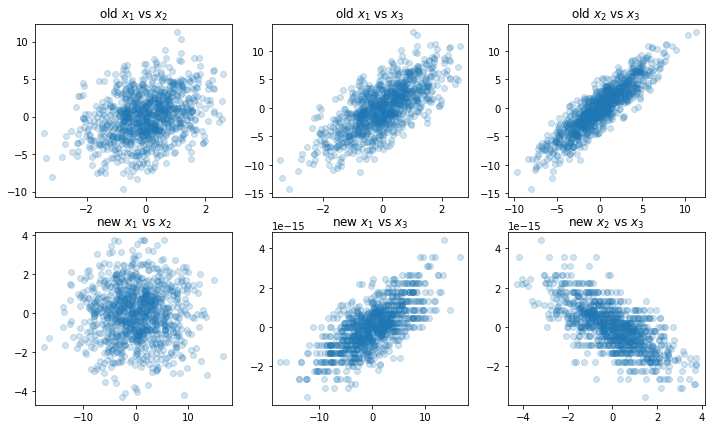

In [2]:
# Prima di tutto applico il cambiamento di base ai vettori del dataframe df spostandomi sulla base degli autovettori di XX^T
dftr = (V.T @ df.T).T 
dftr.columns = ['x1','x2','x3']
# Rappresento i dati a coppie, tutte le possibile coppie a partire da tre features 
fig, ax = plt.subplots(2, 3, figsize = (12,7))
ax[0,0].scatter(df.loc[:,'x1'],df.loc[:,'x2'], alpha=0.2)
ax[0,1].scatter(df.loc[:,'x1'],df.loc[:,'x3'], alpha=0.2)
ax[0,2].scatter(df.loc[:,'x2'],df.loc[:,'x3'], alpha=0.2)
ax[0,0].set_title('old $x_1$ vs $x_2$')
ax[0,1].set_title('old $x_1$ vs $x_3$')
ax[0,2].set_title('old $x_2$ vs $x_3$')
#rappresento i dati così trasfromati dalla matrice di rotazione 
ax[1,0].scatter(dftr.loc[:,'x1'],dftr.loc[:,'x2'], alpha=0.2)
ax[1,1].scatter(dftr.loc[:,'x1'],dftr.loc[:,'x3'], alpha=0.2)
ax[1,2].scatter(dftr.loc[:,'x2'],dftr.loc[:,'x3'], alpha=0.2)
ax[1,0].set_title('new $x_1$ vs $x_2$')
ax[1,1].set_title('new $x_1$ vs $x_3$')
ax[1,2].set_title('new $x_2$ vs $x_3$')

In [3]:
# Un'ulteriore modo per creare il dataframe sarebbe dunque la seguente 
datatry = {'x1' : np.random.normal(0, 1, size = (1000))}
datatry['x2'] = datatry['x1'] + np.random.normal(0, 3, size = (1000))
datatry['x3'] = 2*datatry['x1'] + datatry['x2']
dftry = pd.DataFrame(datatry)

## Osservazione sugli array e la loro interpretazione nei dizionari
Trasformando in dataframe un dizionario in cui ad una chiave metto come values un array di size = (1000,1) è come se pandas leggesse degli scalari. Mentre se utilizzo soltanto size = 1000 allora il problema sembra essere risolto. Questo accade perchè c'è una sostanziale differenza tra un array (1000,1) e (1000,) !!!! Uno è un array di array l'altro una semplice successione di numeri che python interpreta come un array di valori (per noi invece sono entrambi vettori colonna unidimensionali). Il dizionario ha bisogno di un array di numeri per interpretarlo come una lista mentre se gli assegno un array di array (dove in questo caso si palesa con due parentesi quadre, la prima per l'array esterno il secondo per la riga della matrice, se avessi avuto più righe avrei avuto altre parentesi quadre per altri array) non sa interpretarlo come lista perchè gli specifico una seconda dimensione e crede che i valori che gli ho passato siano scalari e non una successione. <br>
Ecco che per esempio quando abbiamo un np.array di dimensione (m,n) allora esso sarà un array di m array ognuno di n elementi. Per chiamare l'elemento (i,j) possiamo scrivere sia array$[i,j]$ che array$[i][j]$ come se fosse una contrazione di un tensore a due indici due volte in quanto seleziono prima la riga con l'indice i e dentro l'array selezionato trovo il j-esimo elemento. Se invece scrivessi array$[i]$ allora l'output sarebbe l'i-esimo array (riga) dell'array. Se scrivessi array$[k]$ con k>i supererei il massimo numero di righe dell'array mentre su MATLAB, ad esempio, la stessa chiamata è interpretata in maniera lineare nel senso che l'array è sempre un oggetto unico di n elementi riorganizzati in righe e colonne e array$[k]$ selezionerebbe il k-esimo elemento della matrice se vista tramite un isomorfismo in R^n come un vettore colonne di dimensione n.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [2]:
# devo aggiungere altre 10 colonne al dataframe che ho creato. Queste devono contenere random noise rappresentato da variabili distribuite normalmente non correlate tra loro con deviazione standard 50 volte minore rispetto a quella usata per produrre x1 e x2 
# per essere 10 variabili gaussiane non correlate tra loro utilizzo medie e deviazione standard distribuite casualmente in un intervallo ([0,1] per la media e [0,1]/50 per la deviazione standard)
mean = np.random.uniform(0,1, size=(10))
variances = np.random.uniform(0,3, size=(10))/50
#adesso creo le dieci colonne di noise
noise = np.random.multivariate_normal(mean,np.diag(variances),N)
dfnoise = pd.DataFrame(noise)
dftotal = pd.concat([df,dfnoise], axis=1)
covmat1 = np.cov(dftotal.T)
l1, V1 = np.linalg.eig(covmat1)  
k = np.argsort(-l1)
l1 = l1[k]
V1 = V1[:,k]
trace1 = np.sum(l1)
print("Percentage of the total dataset's variability explained by the principal component of largest eigenvalue:",(l1[0]/trace1)*100)
print("Percentages of the total dataset's variability explained by the principal component of the 2 largest eigenvalues:",(np.sum(l1[:2]))/trace1*100)

Percentage of the total dataset's variability explained by the principal component of largest eigenvalue: 92.66789378916624
Percentages of the total dataset's variability explained by the principal component of the 2 largest eigenvalues: 98.88533857441253


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 